In [0]:
import pandas as pd
import numpy as np

In [0]:
admision = pd.read_csv('admision.csv')

In [3]:
admision.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [0]:
admision = admision.rename(columns={'Serial No.':'Id','GRE Score':'GRE','TOEFL Score':'TOEFL','University Rating':'University','SOP':'SOP','LOR':'LOR','CGPA':'CGPA','Research':'Research','Chance of Admit ':'Admision'})

In [11]:
admision.head()

,Id,GRE,TOEFL,University,SOP,LOR,CGPA,Research,Admision
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [0]:
y = admision.Admision

In [0]:
x = admision.University

In [0]:
m, b = np.polyfit(x,y,1)

In [0]:
y_mean = y.mean()
x_mean = x.mean()

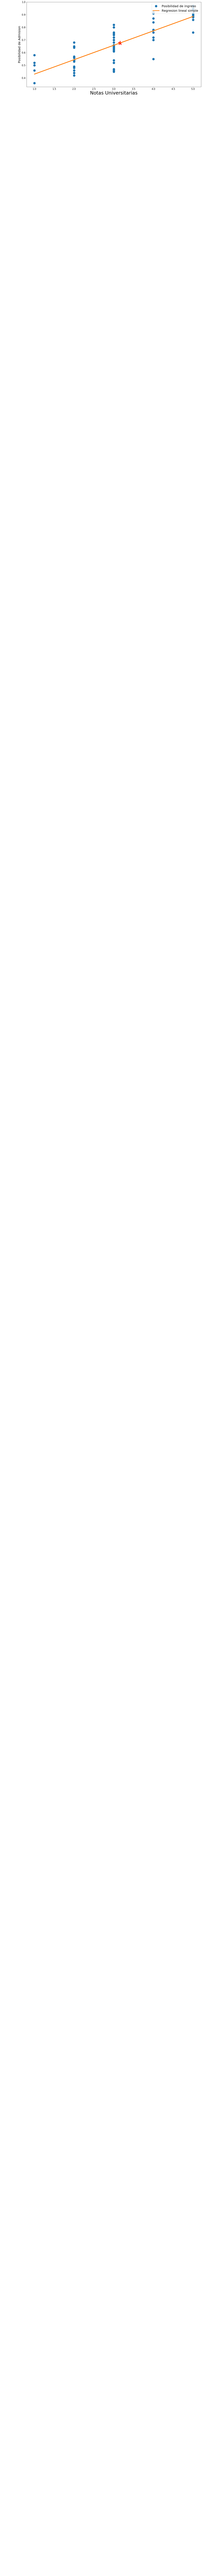

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.plot(x,y, 'o', markersize = 14, label = "Posibilidad de ingreso")
plt.plot(x_mean,y_mean, '*', markersize = 30, color = "r")
plt.plot(x, m*x + b, '-', label = 'Regresion lineal simple', linewidth = 4)
plt.ylabel('Posibilidad de Admision', fontsize = 20)
plt.xlabel('Notas Universitarias', fontsize = 30)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.annotate('Centroide', xy=(x_mean-0.1, y_mean-5), xytext=(x_mean-3, y_mean-20), arrowprops=dict(facecolor='black', shrink=0.05), fontsize = 30)
plt.legend(loc = 'upper right', fontsize = 20)
plt.show()

In [0]:
x_input = admision.drop(['Admision'],axis=1)

In [18]:
x_input.head()

,Id,GRE,TOEFL,University,SOP,LOR,CGPA,Research
0,1,337,118,4,4.5,4.5,9.65,1
1,2,324,107,4,4.0,4.5,8.87,1
2,3,316,104,3,3.0,3.5,8.00,1
3,4,322,110,3,3.5,2.5,8.67,1
4,5,314,103,2,2.0,3.0,8.21,0


In [0]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x_input,y, test_size=0.30)

In [20]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48 entries, 50 to 61
Data columns (total 8 columns):
Id            48 non-null int64
GRE           48 non-null int64
TOEFL         48 non-null int64
University    48 non-null int64
SOP           48 non-null float64
LOR           48 non-null float64
CGPA          48 non-null float64
Research      48 non-null int64
dtypes: float64(3), int64(5)
memory usage: 3.4 KB


In [0]:
from sklearn import linear_model
reg = linear_model.LinearRegression()

In [22]:
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
pred = reg.predict(x_test)

In [24]:
pred

array([0.62150127, 0.63905153, 0.68977756, 0.58701168, 0.56725478,
       0.5581734 , 0.60394576, 0.59254594, 0.48868406, 0.73579962,
       0.62326643, 0.68812526, 0.92670939, 0.71249711, 0.84953574,
       0.94115851, 0.78623298, 0.70136972, 0.40843005, 0.63887664,
       0.93644158])

In [25]:
x_test

,Id,GRE,TOEFL,University,SOP,LOR,CGPA,Research
16,17,317,107,3,4.0,3.0,8.70,0
54,55,322,110,3,3.0,3.5,8.00,0
3,4,322,110,3,3.5,2.5,8.67,1
36,37,299,106,2,4.0,4.0,8.40,0
62,63,304,105,2,3.0,3.0,8.20,1
30,31,300,97,2,3.0,3.0,8.10,1
51,52,312,100,2,1.5,3.5,7.90,1
27,28,298,98,2,1.5,2.5,7.50,1
37,38,300,105,1,1.0,2.0,7.80,0
52,53,334,116,4,4.0,3.0,8.00,1


In [26]:
from sklearn.metrics import r2_score
r2_score(y_test,pred)

0.7127222355842809